## Лабораторная работа №3

Обработка пропусков данных, кодирование категориальных признаков, масштабирование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Для анализа используем данные из Comic Characters Dataset

In [10]:
data = pd.read_csv('marvel-wikia-data.csv', sep=",")
print('Количество строк = ', data.shape[0])
print('Количество колонок = ', data.shape[1])

Количество строк =  16376
Количество колонок =  13


In [5]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [8]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


### Обработка пропусков в данных

1. Простые стратегии

In [13]:
#удаляем все строки, содержащие пустые значения
data1 = data.dropna(axis=0, how='any')
print('Новое количество строк = ', data1.shape[0])

Новое количество строк =  58


In [14]:
#или удаляем все колонки, содержащие пустые значения
data1 = data.dropna(axis=1, how='any')
print('Новое количество колонок = ', data1.shape[1])

Новое количество колонок =  3


In [20]:
#Заполняем пропущенные значения нулями
data1 = data.fillna(0)

#в нашем случае результат получается некорректным, т.к. пропуски присутствуют не только в числовых колонках

### Импьютация (внедрение значений)

In [21]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [25]:
#находим, в каких колонках есть пропущенные значения
cols = []
for col in data.columns:
    null_values = data[data[col].isnull()].shape[0]
    d_type = str(data[col].dtype)
    if null_values>0 and ( d_type=='float64' or  d_type=='int64'): #если в числовой колонке есть пропуски
        cols.append(col)
        null_percent = round((null_values / 16376) * 100.0, 2)

        print('Колонка {}. Тип данных {}. Количество пустых значений = {}, ({}%).'.format(col, d_type, null_values, null_percent))
        

Колонка APPEARANCES. Тип данных float64. Количество пустых значений = 1096, (6.69%).
Колонка Year. Тип данных float64. Количество пустых значений = 815, (4.98%).


In [26]:
#колонки с пропусками
data0 = data[cols]
data0

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


In [31]:
#берём колонку APPEARANCES и запоминаем индексы всех строк, где есть пустые значения 
null_str_index = data[data['APPEARANCES'].isnull()].index

data0[data0.index.isin(null_str_index)]['APPEARANCES']

15280   NaN
15281   NaN
15282   NaN
15283   NaN
15284   NaN
         ..
16371   NaN
16372   NaN
16373   NaN
16374   NaN
16375   NaN
Name: APPEARANCES, Length: 1096, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

#выделяем колонку APPEARANCES в отдельную переменную
data0_App = data0[['APPEARANCES']]
data0_App.head()

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0


In [39]:
strategies=['mean', 'median','most_frequent']

In [40]:
def impute_col(dataset, col, strategy_param):
    
    temp = dataset[[col]]
    
    ind = MissingIndicator()
    missing_values = ind.fit_transform(temp)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp)
    
    filled_data = data_num_imp[missing_values]
    
    return col, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [41]:
impute_col (data, 'APPEARANCES', strategies[0])

('APPEARANCES', 'mean', 1096, 17.033376963350786, 17.033376963350786)

In [42]:
impute_col (data, 'APPEARANCES', strategies[1])

('APPEARANCES', 'median', 1096, 3.0, 3.0)

In [43]:
impute_col (data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', 1096, 1.0, 1.0)

In [47]:
impute_col (data, 'Year', strategies[0])

('Year', 'mean', 815, 1984.9518025833815, 1984.9518025833815)

In [48]:
impute_col (data, 'Year', strategies[1])

('Year', 'median', 815, 1990.0, 1990.0)

In [49]:
impute_col (data, 'Year', strategies[2])

('Year', 'most_frequent', 815, 1993.0, 1993.0)

In [50]:
#находим, в каких колонках есть пропущенные значения
cols = []
for col in data.columns:
    null_values = data[data[col].isnull()].shape[0]
    d_type = str(data[col].dtype)
    if null_values>0 and ( d_type=='object'): #если в категориальной колонке есть пропуски
        cols.append(col)
        null_percent = round((null_values / 16376) * 100.0, 2)

        print('Колонка {}. Тип данных {}. Количество пустых значений = {}, ({}%).'.format(col, d_type, null_values, null_percent))
        

Колонка ID. Тип данных object. Количество пустых значений = 3770, (23.02%).
Колонка ALIGN. Тип данных object. Количество пустых значений = 2812, (17.17%).
Колонка EYE. Тип данных object. Количество пустых значений = 9767, (59.64%).
Колонка HAIR. Тип данных object. Количество пустых значений = 4264, (26.04%).
Колонка SEX. Тип данных object. Количество пустых значений = 854, (5.21%).
Колонка GSM. Тип данных object. Количество пустых значений = 16286, (99.45%).
Колонка ALIVE. Тип данных object. Количество пустых значений = 3, (0.02%).
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений = 815, (4.98%).


In [58]:
temp_data = data[['ALIVE']]
temp_data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [59]:
temp_data[temp_data['ALIVE'].isnull()].shape

(3, 1)

In [65]:
# Импьютация с помощью наиболее часто встречающихся значений
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(temp_data)

#проверяем наличие пустых значений:
np.unique(data_imp2)

array(['Deceased Characters', 'Living Characters'], dtype=object)

In [68]:
# Импьютация с помощью константы
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data_imp3 = imp3.fit_transform(temp_data)

np.unique(data_imp3)

array(['Deceased Characters', 'Living Characters', 'Unknown'],
      dtype=object)

In [69]:
data_imp3[data_imp3=='Unknown'].size

3

## Преобразование категориальных признаков в числовые

In [72]:
#Кодирование категорий целочисленными значениями

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

enc_list = pd.DataFrame({'col1':data_imp2.T[0]})
le = LabelEncoder()
enc_le = le.fit_transform(enc_list['col1'])

enc_list['col1'].unique()

array(['Living Characters', 'Deceased Characters'], dtype=object)

In [82]:
le.inverse_transform(np.unique(enc_le))
enc_le

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
#кодирование категорий бинарными наборами данных


temp_data2 = data[['ALIGN']] 
data_imp4 = imp2.fit_transform(temp_data2)

new_enc_list = pd.DataFrame({'col':data_imp4.T[0]})
pd.get_dummies(new_enc_list).head()

,col_Bad Characters,col_Good Characters,col_Neutral Characters
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [94]:
pd.get_dummies(temp_data2, dummy_na=True).head()

,ALIGN_Bad Characters,ALIGN_Good Characters,ALIGN_Neutral Characters,ALIGN_nan
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


## Масштабирование данных 

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

/home/ivan/6_sem/ne_park/tmo/lab3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ivan/6_sem/ne_park/tmo/lab3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


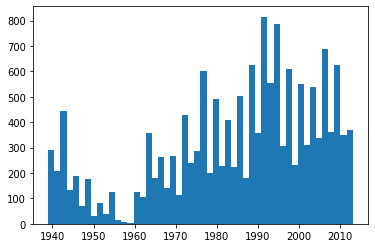

In [105]:
#MinMax масштабирование

sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])

plt.hist(data['Year'], 50)
plt.show()

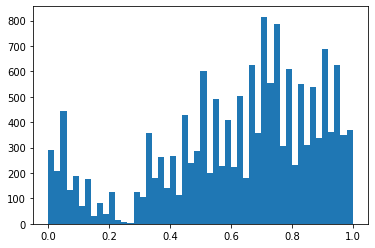

In [106]:
plt.hist(sc1_data, 50)
plt.show()

/home/ivan/6_sem/ne_park/tmo/lab3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ivan/6_sem/ne_park/tmo/lab3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


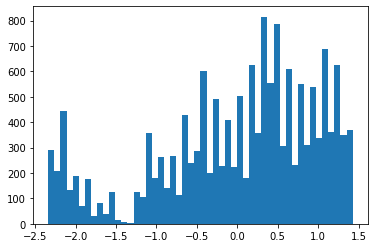

In [107]:
#Масштабирование данных на основе Z-оценки

sc1 = StandardScaler()
sc1_data = sc1.fit_transform(data[['Year']])

plt.hist(sc1_data, 50)
plt.show()